In [1]:
import pandas as pd
from multi_factors_backtest import *

In [2]:
#GRU_factor,GRU_patch_factor Preprocessing
def factor_Preprocessing(data,m = 10,patch = False):
    new_factor = data.copy()
    new_factor[new_factor.columns[0]] = new_factor[new_factor.columns[0]].apply(lambda x: x.lower())
    new_factor.set_index([new_factor.columns[0]],inplace=True)
    new_factor = new_factor.iloc[:,0::m]
    new_factor.columns = [pd.Timestamp(x) for x in new_factor.columns]
    new_factor = new_factor.unstack().to_frame()
    new_factor.rename_axis(index=['date','asset'],inplace=True)
    if not patch:
        new_factor.columns = ['GRU_factor']
    else:
        new_factor.columns = ['GRU_patch_factor']
    new_factor.sort_index(level=['asset', 'date'],inplace=True)
    return new_factor

In [14]:
#读取数据
df_GRU_factor = pd.read_csv('../data/saved_factor/fac1.csv')
df_GRU_factor = factor_Preprocessing(df_GRU_factor)
df_GRU_patch_factor = pd.read_csv('../data/saved_factor/fac2.csv')
df_GRU_patch_factor = factor_Preprocessing(df_GRU_patch_factor,patch = True)
df_price = pd.read_parquet('../data/backtest_data/price_23_24.par')
df_pool = pd.read_pickle('../data/backtest_data/pool_23_24.pkl')
df_benchmark = pd.read_pickle('../data/backtest_data/benchmark_000985_23_24.pkl')

In [15]:
df_GRU_factor

,,GRU_factor
date,asset,
2023-03-29,sh600000,-1.371356
2023-04-13,sh600000,-0.823966
2023-04-27,sh600000,-1.068712
2023-05-16,sh600000,-1.856871
2023-05-30,sh600000,-1.756791
...,...,...
2024-01-08,sz301591,-1.927985
2024-01-22,sz301591,-2.096848
2024-02-05,sz301591,-0.188311


In [16]:
df_GRU_patch_factor

,,GRU_patch_factor
date,asset,
2023-03-29,sh600000,0.408289
2023-04-13,sh600000,0.412661
2023-04-27,sh600000,0.184374
2023-05-16,sh600000,0.016240
2023-05-30,sh600000,0.229244
...,...,...
2024-01-08,sz301591,0.301972
2024-01-22,sz301591,0.366555
2024-02-05,sz301591,0.499894


In [17]:
df_factor = df_GRU_factor.merge(df_GRU_patch_factor,on=['date','asset'])

In [18]:
#因子数据
df_factor

,,GRU_factor,GRU_patch_factor
date,asset,,
2023-03-29,sh600000,-1.371356,0.408289
2023-04-13,sh600000,-0.823966,0.412661
2023-04-27,sh600000,-1.068712,0.184374
2023-05-16,sh600000,-1.856871,0.016240
2023-05-30,sh600000,-1.756791,0.229244
...,...,...,...
2024-01-08,sz301591,-1.927985,0.301972
2024-01-22,sz301591,-2.096848,0.366555
2024-02-05,sz301591,-0.188311,0.499894


In [19]:
#收盘价格
df_price

,,price
date,asset,
2023-01-03,sh600000,107.549896
2023-01-04,sh600000,108.739899
2023-01-05,sh600000,109.334900
2023-01-06,sh600000,109.186203
2023-01-09,sh600000,109.186203
...,...,...
2024-04-03,sz301591,44.360001
2024-04-08,sz301591,41.810001
2024-04-09,sz301591,43.180000


In [20]:
#基准收益中证全指 000985
df_benchmark

{'000985':                  000985
 date                   
 2011-01-04  3715.530029
 2011-01-05  3709.429932
 2011-01-06  3691.120117
 2011-01-07  3687.250000
 2011-01-10  3605.540039
 ...                 ...
 2024-04-03  4353.738770
 2024-04-08  4293.420898
 2024-04-09  4315.467285
 2024-04-10  4258.492188
 2024-04-11  4265.379395
 
 [3224 rows x 1 columns]}

In [21]:
df_benchmark['000985']

,000985
date,
2011-01-04,3715.530029
2011-01-05,3709.429932
2011-01-06,3691.120117
2011-01-07,3687.250000
2011-01-10,3605.540039
...,...
2024-04-03,4353.738770
2024-04-08,4293.420898
2024-04-09,4315.467285


In [22]:
#股票池
df_pool

{'000985': Empty DataFrame
 Columns: []
 Index: [(2023-01-03 00:00:00, sh600000), (2023-01-04 00:00:00, sh600000), (2023-01-05 00:00:00, sh600000), (2023-01-06 00:00:00, sh600000), (2023-01-09 00:00:00, sh600000), (2023-01-10 00:00:00, sh600000), (2023-01-11 00:00:00, sh600000), (2023-01-12 00:00:00, sh600000), (2023-01-13 00:00:00, sh600000), (2023-01-16 00:00:00, sh600000), (2023-01-17 00:00:00, sh600000), (2023-01-18 00:00:00, sh600000), (2023-01-19 00:00:00, sh600000), (2023-01-20 00:00:00, sh600000), (2023-01-30 00:00:00, sh600000), (2023-01-31 00:00:00, sh600000), (2023-02-01 00:00:00, sh600000), (2023-02-02 00:00:00, sh600000), (2023-02-03 00:00:00, sh600000), (2023-02-06 00:00:00, sh600000), (2023-02-07 00:00:00, sh600000), (2023-02-08 00:00:00, sh600000), (2023-02-09 00:00:00, sh600000), (2023-02-10 00:00:00, sh600000), (2023-02-13 00:00:00, sh600000), (2023-02-14 00:00:00, sh600000), (2023-02-15 00:00:00, sh600000), (2023-02-16 00:00:00, sh600000), (2023-02-17 00:00:00, sh600

In [23]:
df_pool['000985']

,
date,asset
2023-01-03,sh600000
2023-01-04,sh600000
2023-01-05,sh600000
2023-01-06,sh600000
2023-01-09,sh600000
...,...
2024-04-10,sz301558
2024-04-11,sz301558
2024-04-09,sz301559


In [24]:
Backtest = MultiFactor_MultiPool_BackTest(
    factor_data=df_factor,
    price_data=df_price,
    benchmark_data=df_benchmark,
    pool_data=df_pool,
    start_date='20230329',
    end_date='20240410',
    is_daily_factor= False,
    direction= {'GRU_factor':1,'GRU_patch_factor':-1},
    quantiles=10)
Backtest.generate_single_factor_pool_object()

In [26]:
Backtest.analyse_factor_autocorrelation(factor_name='GRU_factor',pool_name='000985')


,均值,标准差
1阶自相关系数,0.397711,0.076176
2阶自相关系数,0.205453,0.111371
3阶自相关系数,0.149982,0.117054
4阶自相关系数,0.110389,0.124640
5阶自相关系数,0.081422,0.092148


In [27]:

Backtest.analyse_factor_autocorrelation(factor_name='GRU_patch_factor',pool_name='000985')

,均值,标准差
1阶自相关系数,0.387248,0.187594
2阶自相关系数,0.252971,0.100317
3阶自相关系数,0.186559,0.104451
4阶自相关系数,0.140035,0.109813
5阶自相关系数,0.091018,0.098042


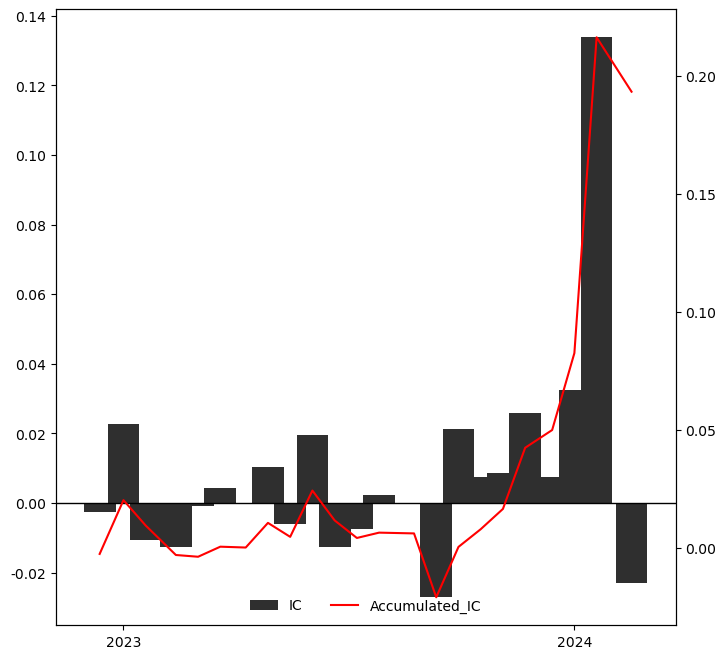

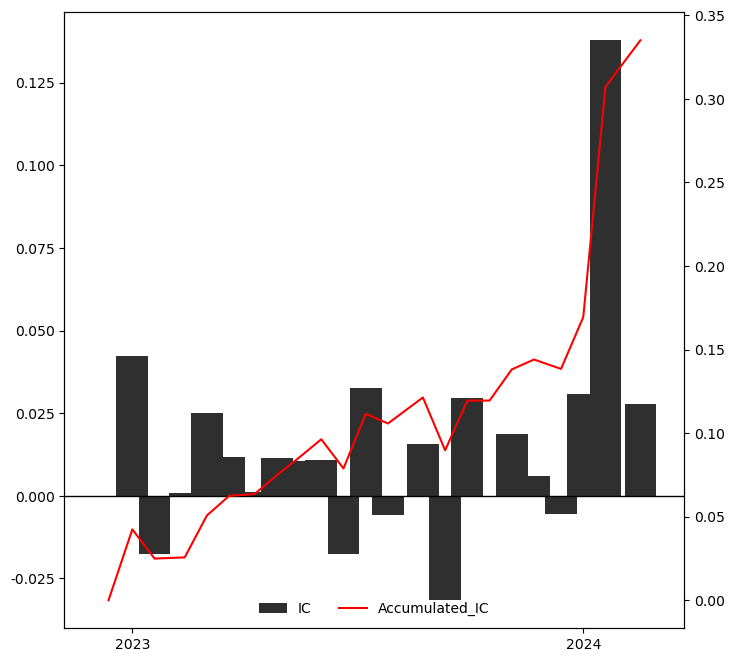

In [29]:
#IC 和 累计 IC
Backtest.plot_ic(factor_name='GRU_factor',pool_name='000985',bar_figure=True)
Backtest.plot_ic(factor_name='GRU_patch_factor',pool_name='000985',bar_figure=True)

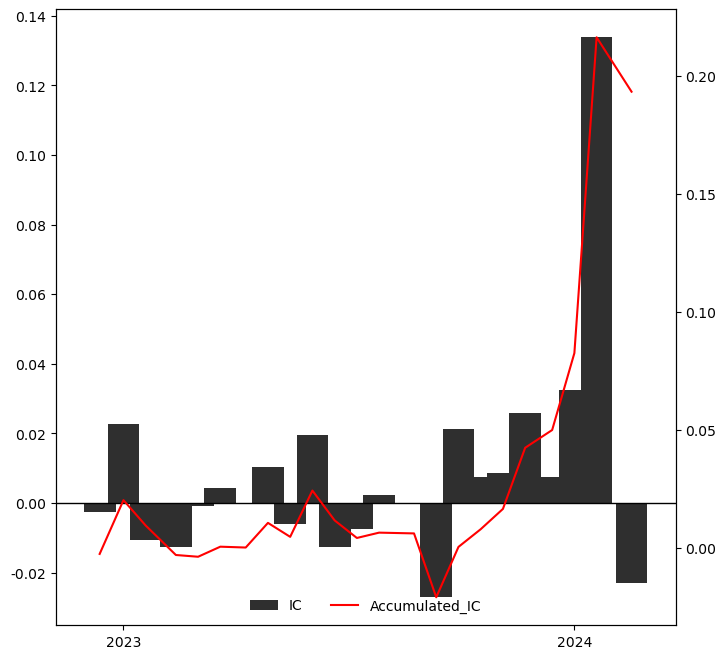

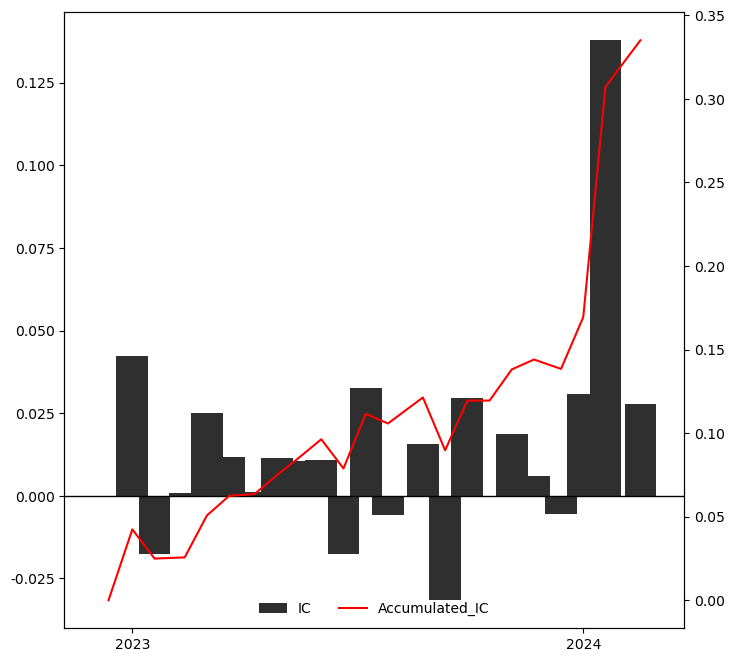

In [30]:
#分行业IC
Backtest.plot_ic(factor_name='GRU_factor',pool_name='000985',bar_figure=True)
Backtest.plot_ic(factor_name='GRU_patch_factor',pool_name='000985',bar_figure=True)

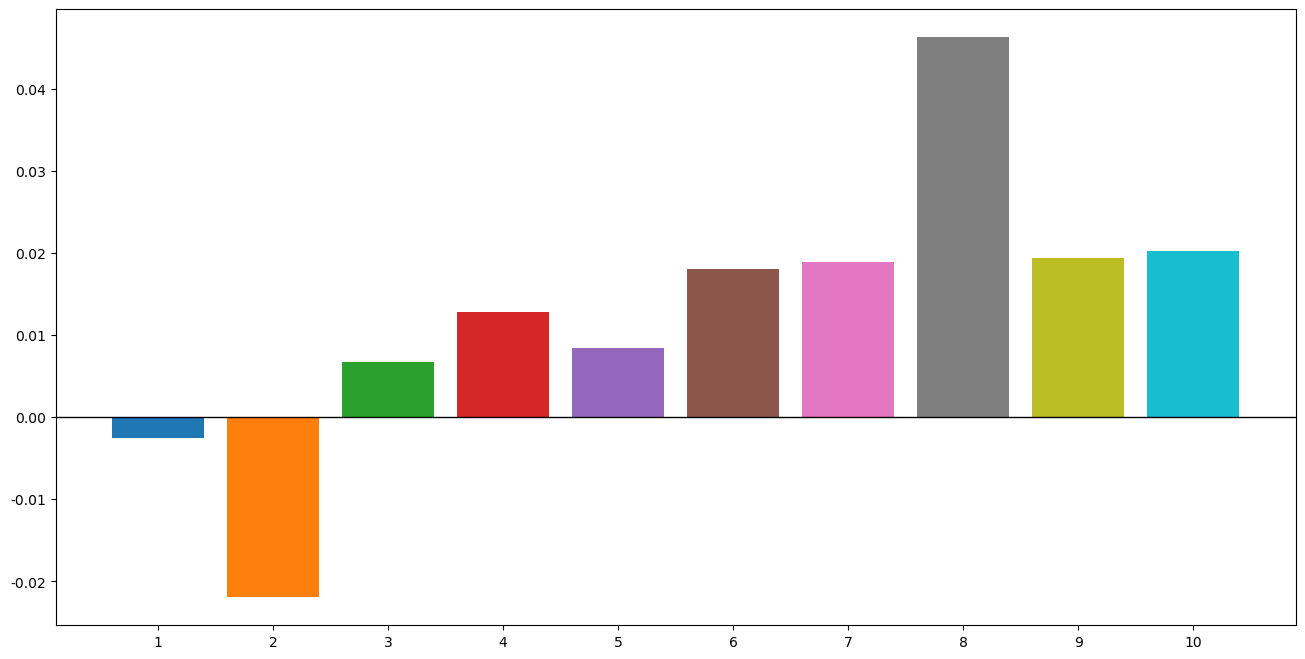

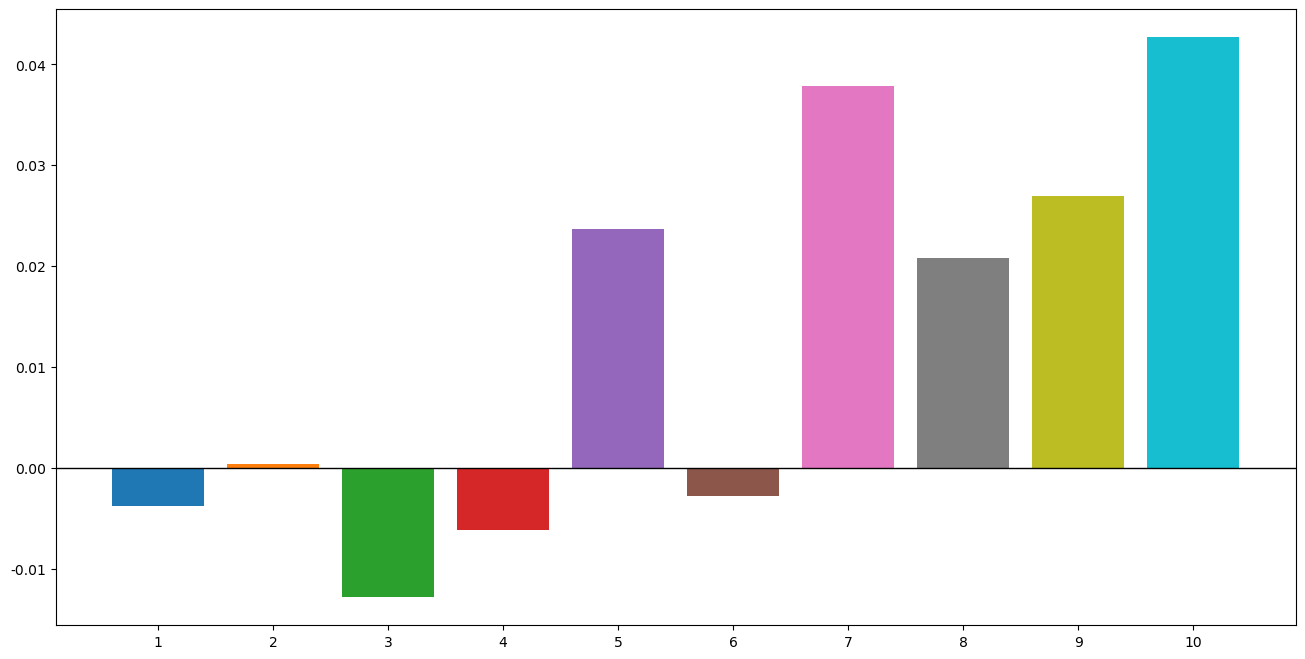

In [31]:
# 绘制不同分组的年化收益柱形图
Backtest.plot_quantile_annualized_return(factor_name='GRU_factor',pool_name='000985')
Backtest.plot_quantile_annualized_return(factor_name='GRU_patch_factor',pool_name='000985')

In [32]:
# 输出因子分组收益情况的详细分析
Backtest.analyse_return_array(factor_name='GRU_factor',pool_name='000985')

,年化收益,年化波动率,夏普比率,最大回撤,卡玛比率,超额年化收益,超额年化波动率,信息比率,超额最大回撤,超额收益卡玛比率,相对基准胜率,相对整体胜率,盈亏比
factor_quantile,,,,,,,,,,,,,
1,-0.101550,0.235578,-0.494740,-0.326735,-0.310802,-0.003805,0.125780,-0.030249,-0.206012,-0.018468,0.652174,0.136364,0.583073
2,-0.098255,0.236679,-0.478519,-0.333066,-0.295002,0.000368,0.121753,0.003025,-0.195668,0.001882,0.652174,0.090909,0.592703
3,-0.109739,0.232953,-0.535466,-0.327477,-0.335103,-0.012841,0.120362,-0.106685,-0.191404,-0.067088,0.565217,0.045455,0.809628
4,-0.103885,0.234147,-0.507738,-0.332944,-0.312020,-0.006158,0.120156,-0.051248,-0.194860,-0.031601,0.652174,0.045455,0.555652
5,-0.076842,0.235766,-0.389547,-0.326325,-0.235477,0.023625,0.125410,0.188385,-0.209142,0.112963,0.652174,0.181818,0.675188
6,-0.100855,0.237033,-0.488771,-0.343019,-0.294020,-0.002771,0.125355,-0.022109,-0.207274,-0.013371,0.608696,0.045455,0.705193
7,-0.064000,0.237965,-0.331980,-0.318198,-0.201132,0.037875,0.128740,0.294198,-0.197968,0.191320,0.695652,0.136364,0.595532
8,-0.079430,0.237028,-0.398392,-0.324994,-0.244405,0.020791,0.126977,0.163742,-0.206188,0.100837,0.695652,0.136364,0.543395
9,-0.073814,0.234863,-0.378150,-0.320753,-0.230125,0.026983,0.123033,0.219313,-0.193173,0.139682,0.652174,0.045455,0.710344


In [33]:
Backtest.analyse_return_array(factor_name='GRU_patch_factor',pool_name='000985')

,年化收益,年化波动率,夏普比率,最大回撤,卡玛比率,超额年化收益,超额年化波动率,信息比率,超额最大回撤,超额收益卡玛比率,相对基准胜率,相对整体胜率,盈亏比
factor_quantile,,,,,,,,,,,,,
1,-0.101550,0.235578,-0.494740,-0.326735,-0.310802,-0.003805,0.125780,-0.030249,-0.206012,-0.018468,0.652174,0.136364,0.583073
2,-0.098255,0.236679,-0.478519,-0.333066,-0.295002,0.000368,0.121753,0.003025,-0.195668,0.001882,0.652174,0.090909,0.592703
3,-0.109739,0.232953,-0.535466,-0.327477,-0.335103,-0.012841,0.120362,-0.106685,-0.191404,-0.067088,0.565217,0.045455,0.809628
4,-0.103885,0.234147,-0.507738,-0.332944,-0.312020,-0.006158,0.120156,-0.051248,-0.194860,-0.031601,0.652174,0.045455,0.555652
5,-0.076842,0.235766,-0.389547,-0.326325,-0.235477,0.023625,0.125410,0.188385,-0.209142,0.112963,0.652174,0.181818,0.675188
6,-0.100855,0.237033,-0.488771,-0.343019,-0.294020,-0.002771,0.125355,-0.022109,-0.207274,-0.013371,0.608696,0.045455,0.705193
7,-0.064000,0.237965,-0.331980,-0.318198,-0.201132,0.037875,0.128740,0.294198,-0.197968,0.191320,0.695652,0.136364,0.595532
8,-0.079430,0.237028,-0.398392,-0.324994,-0.244405,0.020791,0.126977,0.163742,-0.206188,0.100837,0.695652,0.136364,0.543395
9,-0.073814,0.234863,-0.378150,-0.320753,-0.230125,0.026983,0.123033,0.219313,-0.193173,0.139682,0.652174,0.045455,0.710344


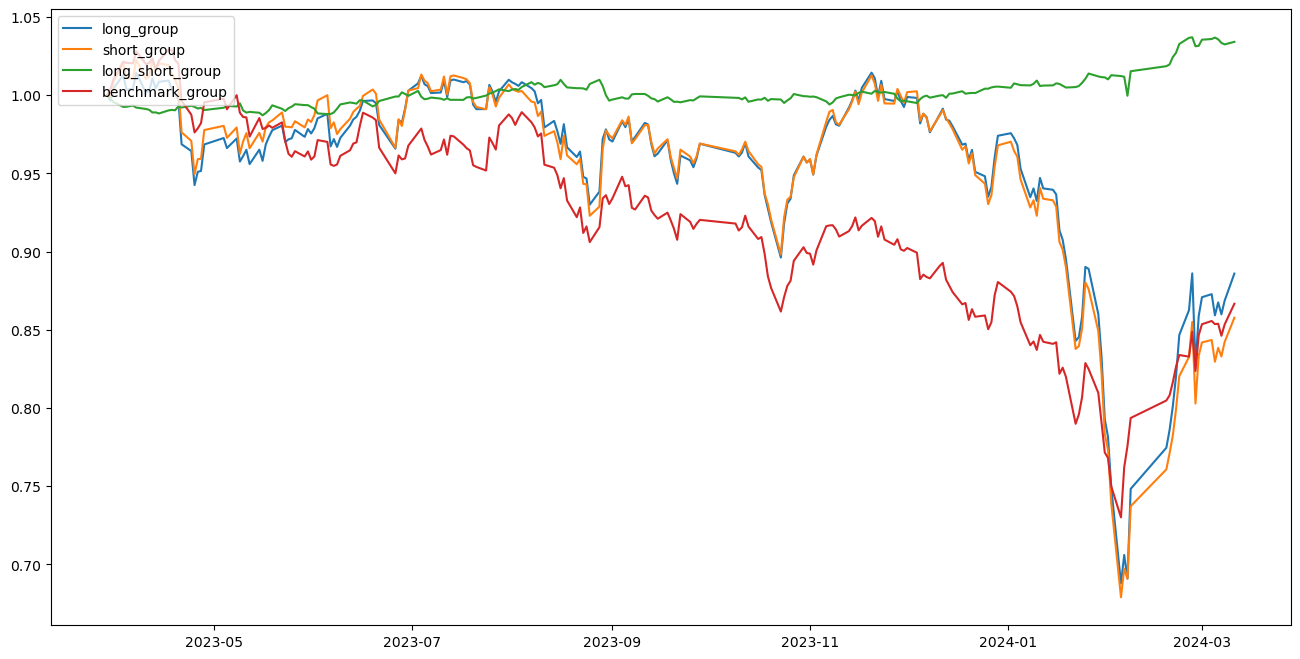

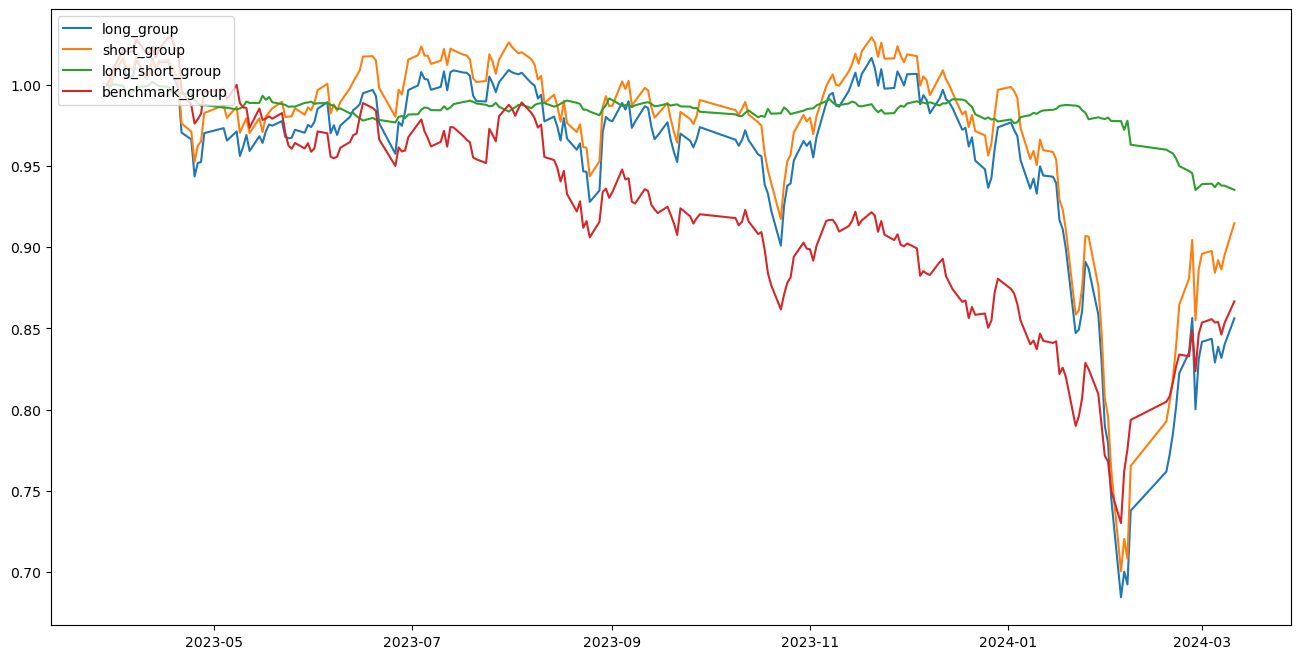

In [34]:
# 绘制净值曲线
Backtest.plot_accumulated_net_value(factor_name='GRU_factor',pool_name='000985',plot_type='long_short')
Backtest.plot_accumulated_net_value(factor_name='GRU_patch_factor',pool_name='000985',plot_type='long_short')